In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from knn_weights import *
from matplotlib.colors import ListedColormap

from space_metric import *
from knn_plot import *
from knn_tests import *

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from pandas.plotting import scatter_matrix
import seaborn as sns
from knn_classifier_class import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [15]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=40)
feature_names = iris['feature_names']

In [16]:
def cross_plot_data(X_train, y_train, knn_classifier):
    plt.rcParams['figure.figsize'] = [15, 15]

    fig, ax = plt.subplots(4, 4)

    for i in range(4):
        for j in range(4):                
            scatter_markers(ax[i, j], X_train[:, i], X_train[:, j], y_train, 7, 'D')
            scatter_markers(ax[i, j], knn_classifier.reduced_x[:, i], knn_classifier.reduced_x[:, j], knn_classifier.reduced_y, 50, 'x')
            if i == 0:
                ax[i, j].set_title(feature_names[j])
            if j == 0:
                ax[i, j].set_ylabel(feature_names[i])
                
    plt.legend()
    plt.grid()
    plt.show()

In [17]:
def reduced_objs_of_class(knn_classifier, id):
    return knn_classifier.reduced_y[knn_classifier.reduced_y == id].shape[0]

In [26]:
windows = [gauss_window] #[epanchinkow_window, square_window, triangular_window, gauss_window]
metrics = [1, 2, 3, 4, 5]
scales = [2, 2.5, 3, 3.5, 4, 4.5, 5]#[2, 2.3, 2.5, 2.8, 3, 3.3, 3.5, 3.8, 4, 4.3]

best_window = windows[0]
best_metric = metrics[0]
best_scale = scales[0]
best_seed = 0

least_0 = -1

for seed in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=seed)

    for window in windows:
        for metric in metrics:
            for scale in scales:
                knn_classifier = KnnPowerClassifier(get_dst_metric(metric), window, 100, 15, scale)
                knn_classifier.fit(X_train, y_train)
                knn_classifier.reduce()

                prediction = knn_classifier.predict(X_train)
                accuracy = compute_accuracy(prediction, y_train)

                zero_class_count = reduced_objs_of_class(knn_classifier, 0)
                
                if(least_0 == -1 or zero_class_count < least_0):
                    least_0 = zero_class_count

                    best_scale = scale
                    best_metric = metric
                    best_window = window
                    best_seed = seed

                print(zero_class_count, ' seed: ', seed, ' acc: ', accuracy, ' m: ', metric, ' s: ', scale, window)

13  seed:  0  acc:  1.0  m:  1  s:  2 <function gauss_window at 0x000002247FFE6D30>
13  seed:  0  acc:  1.0  m:  1  s:  2.5 <function gauss_window at 0x000002247FFE6D30>
11  seed:  0  acc:  1.0  m:  1  s:  3 <function gauss_window at 0x000002247FFE6D30>
10  seed:  0  acc:  1.0  m:  1  s:  3.5 <function gauss_window at 0x000002247FFE6D30>
7  seed:  0  acc:  1.0  m:  1  s:  4 <function gauss_window at 0x000002247FFE6D30>
6  seed:  0  acc:  1.0  m:  1  s:  4.5 <function gauss_window at 0x000002247FFE6D30>
6  seed:  0  acc:  1.0  m:  1  s:  5 <function gauss_window at 0x000002247FFE6D30>
9  seed:  0  acc:  1.0  m:  2  s:  2 <function gauss_window at 0x000002247FFE6D30>
7  seed:  0  acc:  1.0  m:  2  s:  2.5 <function gauss_window at 0x000002247FFE6D30>
5  seed:  0  acc:  1.0  m:  2  s:  3 <function gauss_window at 0x000002247FFE6D30>
5  seed:  0  acc:  1.0  m:  2  s:  3.5 <function gauss_window at 0x000002247FFE6D30>
5  seed:  0  acc:  1.0  m:  2  s:  4 <function gauss_window at 0x00000224

In [27]:
print(least_0)
print(best_metric, best_window, best_scale)

4
5 <function gauss_window at 0x000002247FFE6D30> 2.5


In [28]:
knn_classifier = KnnPowerClassifier(get_dst_metric(best_metric), best_window, 100, 15, best_scale)
knn_classifier.fit(X_train, y_train)
knn_classifier.reduce()

In [29]:
print(reduced_objs_of_class(knn_classifier, 0))

12


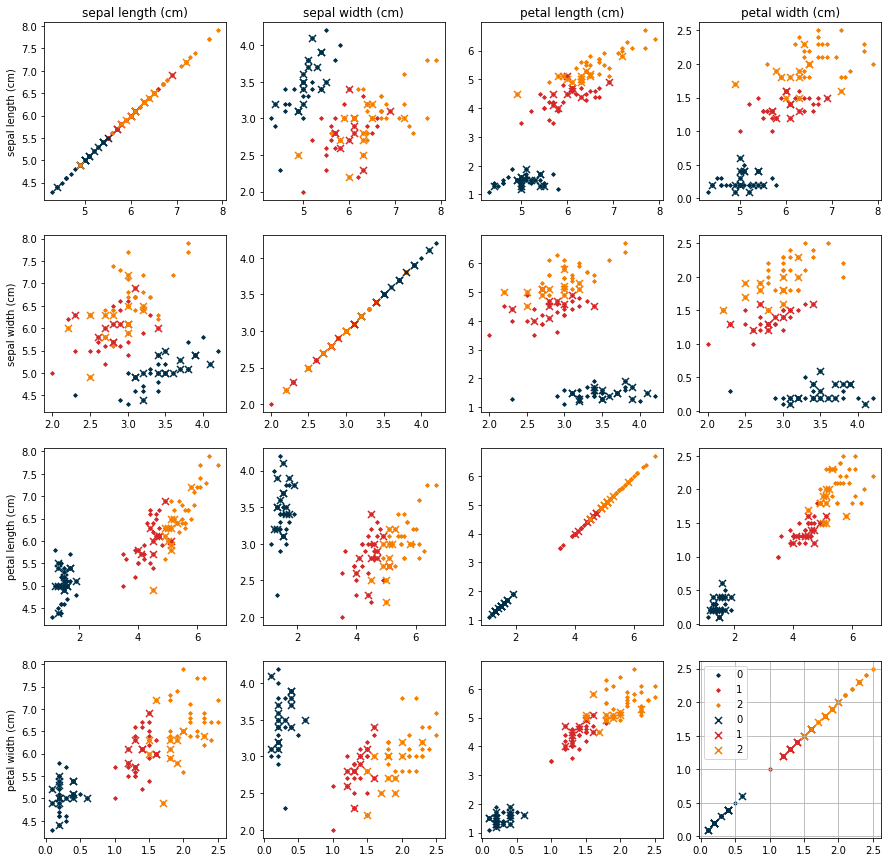

In [39]:
cross_plot_data(X_train, y_train, knn_classifier)